In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from ipywidgets import *
from IPython.display import display

In [2]:
wikipedia_link = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [3]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:64.0) Gecko/20100101 Firefox/64.0'}

In [4]:

wikipedia_page = requests.get(wikipedia_link, headers = headers)

In [5]:
wikipedia_page

<Response [200]>

In [6]:
wikipedia_page.status_code

200

In [7]:
soup = BeautifulSoup(wikipedia_page.content, 'html.parser')

In [8]:
table = soup.find('table', {'class':'wikitable sortable'}).tbody
table

<tbody><tr>
<th>Postal code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park / Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor / Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park / Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern / Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3B
</td>
<td>North York
</td>
<td>Don Mills
</td></tr>
<tr>
<td>M4B
</td>
<td>East York
</td>
<td>Parkview Hill / W

In [9]:
rows = table.find_all('tr')
rows

[<tr>
 <th>Postal code
 </th>
 <th>Borough
 </th>
 <th>Neighborhood
 </th></tr>, <tr>
 <td>M1A
 </td>
 <td>Not assigned
 </td>
 <td>
 </td></tr>, <tr>
 <td>M2A
 </td>
 <td>Not assigned
 </td>
 <td>
 </td></tr>, <tr>
 <td>M3A
 </td>
 <td>North York
 </td>
 <td>Parkwoods
 </td></tr>, <tr>
 <td>M4A
 </td>
 <td>North York
 </td>
 <td>Victoria Village
 </td></tr>, <tr>
 <td>M5A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Regent Park / Harbourfront
 </td></tr>, <tr>
 <td>M6A
 </td>
 <td>North York
 </td>
 <td>Lawrence Manor / Lawrence Heights
 </td></tr>, <tr>
 <td>M7A
 </td>
 <td>Downtown Toronto
 </td>
 <td>Queen's Park / Ontario Provincial Government
 </td></tr>, <tr>
 <td>M8A
 </td>
 <td>Not assigned
 </td>
 <td>
 </td></tr>, <tr>
 <td>M9A
 </td>
 <td>Etobicoke
 </td>
 <td>Islington Avenue
 </td></tr>, <tr>
 <td>M1B
 </td>
 <td>Scarborough
 </td>
 <td>Malvern / Rouge
 </td></tr>, <tr>
 <td>M2B
 </td>
 <td>Not assigned
 </td>
 <td>
 </td></tr>, <tr>
 <td>M3B
 </td>
 <td>North York
 </td>
 <t

In [10]:
columns = [i.text.replace('\n', '')
           for i in rows[0].find_all('th')]
columns

['Postal code', 'Borough', 'Neighborhood']

In [11]:
df = pd.DataFrame(columns = columns)
df

,Postal code,Borough,Neighborhood


In [12]:
for i in range(1, len(rows)):
    tds = rows[i].find_all('td')
    
    
    if len(tds) == 4:
        values = [tds[0].text, tds[1].text, tds[2].text, tds[3].text.replace('\n', ''.replace('\xa0',''))]
    else:
        values = [td.text.replace('\n', '').replace('\xa0','') for td in tds]
        
        df = df.append(pd.Series(values, index = columns), ignore_index = True)

        df

In [13]:
df.shape

(180, 3)

In [14]:

df.head(10)

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,
1,M2A,Not assigned,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
7,M8A,Not assigned,
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,Malvern / Rouge


In [15]:
(df['Borough'] == 'Not assigned').sum()

77

In [16]:
dff = df

In [17]:
df_na = dff[dff.Borough != 'Not assigned']
df_na.head()

,Postal code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [18]:
df_na.shape

(103, 3)

In [20]:
(df_na['Neighborhood'] == 'Not assigned').sum()

0

In [21]:
import numpy as np
df_na['Neighborhood'] = np.where(df_na['Neighborhood'] == 'Not assigned', df_na['Borough'], df_na['Neighborhood'])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [22]:
df_na.shape

(103, 3)

In [23]:
df_na.head(5)

,Postal code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [24]:
type(df_na)

pandas.core.frame.DataFrame

In [27]:
df_ca = df_na.groupby(['Postal code', 'Borough'])['Neighborhood'].apply(', '.join).reset_index()
df_ca.columns = ['Postal code', 'Borough', 'Neighborhood']
df_ca.head(10)

,Postal code,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West
9,M1N,Scarborough,Birch Cliff / Cliffside West


In [28]:
df_toronto = df_ca

In [29]:

type(df_toronto)

pandas.core.frame.DataFrame

In [30]:
df_toronto.head()

,Postal code,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [31]:
df_toronto.to_csv('TorontoPostcodes.csv', index = False)

In [33]:
df_toronto.loc[df_toronto['Postal code'] == 'M5A']

,Postal code,Borough,Neighborhood
53,M5A,Downtown Toronto,Regent Park / Harbourfront


In [34]:
df_toronto.shape

(103, 3)

In [35]:

!pip -q install geocoder

In [36]:
import geocoder

In [37]:
df_toronto.tail(5)

,Postal code,Borough,Neighborhood
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,Kingsview Village / St. Phillips / Martin Grov...
101,M9V,Etobicoke,South Steeles / Silverstone / Humbergate / Jam...
102,M9W,Etobicoke,Northwest


In [38]:
import time
start = time.time()

'''Geocoder starts here'''
'''Defining a function to use --> get_latlng()'''
def get_latlng(arcgis_geocoder):
    
    # Initialize the Location (lat. and long.) to "None"
    lat_lng_coords = None
    
    # While loop helps to create a continous run until all the location coordinates are geocoded
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords
'''Geocoder ends here'''

end = time.time()
print("Time of execution: ", end - start)

Time of execution:  0.00023412704467773438


In [39]:
sample = get_latlng('M4G')
sample

[43.70941386000004, -79.36309957799995]

In [42]:
import time
start = time.time()

postal_codes = df_toronto['Postal code']    
coordinates = [get_latlng(postal_code) for postal_code in postal_codes.tolist()]

end = time.time()
print("Time of execution: ", end - start, "seconds")

Time of execution:  59.08349585533142 seconds


In [43]:
df_toronto_loc = df_toronto

# The obtained coordinates (latitude and longitude) are joined with the dataframe as shown
df_toronto_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
df_toronto_loc['Latitude'] = df_toronto_coordinates['Latitude']
df_toronto_loc['Longitude'] = df_toronto_coordinates['Longitude']

In [44]:
df_toronto_loc.to_csv('TorontoPostcodes.csv', index = False)

df_toronto_loc.head(5)

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.808626,-79.189913
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.785779,-79.157368
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.765806,-79.185284
3,M1G,Scarborough,Woburn,43.771545,-79.218135
4,M1H,Scarborough,Cedarbrae,43.768791,-79.238813


In [49]:
import folium
import pandas as pd

# Toronto_coordinates - 43.6532° N, 79.3832° W
toronto_loc = (43.6532, -79.3832)
# create empty map zoomed in on Toronto
map = folium.Map(location = toronto_loc, zoom_start = 12)

display(map)

In [48]:
! pip install folium

     |████████████████████████████████| 92kB 13.9MB/s eta 0:00:01


In [50]:
import numpy as np

# library for data analsysis
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json
print('numpy, pandas, ..., imported...')

!pip -q install geopy
# conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
print('geopy installed...')
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim
print('Nominatim imported...')

# library to handle requests
import requests
print('requests imported...')

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize
print('json_normalize imported...')

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
print('matplotlib imported...')

# import k-means from clustering stage
from sklearn.cluster import KMeans
print('Kmeans imported...')

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip -q install folium
print('folium installed...')
import folium # map rendering library
print('folium imported...')

numpy, pandas, ..., imported...
geopy installed...
Nominatim imported...
requests imported...
json_normalize imported...
matplotlib imported...
Kmeans imported...
folium installed...
folium imported...


In [51]:
new_df_toronto_loc = df_toronto_loc[df_toronto_loc.Borough.str.contains('Toronto')]
new_df_toronto_loc.head(10)

,Postal code,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.678148,-79.295349
41,M4K,East Toronto,The Danforth West / Riverdale,43.683424,-79.354564
42,M4L,East Toronto,India Bazaar / The Beaches West,43.668291,-79.315578
43,M4M,East Toronto,Studio District,43.648000,-79.339260
44,M4N,Central Toronto,Lawrence Park,43.729455,-79.386415
45,M4P,Central Toronto,Davisville North,43.713171,-79.388870
46,M4R,Central Toronto,North Toronto West,43.714139,-79.406456
47,M4S,Central Toronto,Davisville,43.703327,-79.385649
48,M4T,Central Toronto,Moore Park / Summerhill East,43.690328,-79.383522
49,M4V,Central Toronto,Summerhill West / Rathnelly / South Hill / For...,43.686378,-79.402372


In [52]:

len(new_df_toronto_loc.Borough.value_counts())

4

In [59]:
new_df_toronto_loc.shape

(39, 5)

In [60]:

len(new_df_toronto_loc)

39

In [61]:
df_toronto_coordinates.head(3)

,Latitude,Longitude
0,43.808626,-79.189913
1,43.785779,-79.157368
2,43.765806,-79.185284


In [62]:
df_toronto_coordinates['Latitude'].head(3)

0    43.808626
1    43.785779
2    43.765806
Name: Latitude, dtype: float64

In [63]:
df_toronto_coordinates['Longitude'].head(3)

0   -79.189913
1   -79.157368
2   -79.185284
Name: Longitude, dtype: float64

In [64]:
new_df_toronto_loc['Latitude'].head(3)

37    43.678148
41    43.683424
42    43.668291
Name: Latitude, dtype: float64

In [65]:
new_df_toronto_loc

,Postal code,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.678148,-79.295349
41,M4K,East Toronto,The Danforth West / Riverdale,43.683424,-79.354564
42,M4L,East Toronto,India Bazaar / The Beaches West,43.668291,-79.315578
43,M4M,East Toronto,Studio District,43.648000,-79.339260
44,M4N,Central Toronto,Lawrence Park,43.729455,-79.386415
45,M4P,Central Toronto,Davisville North,43.713171,-79.388870
46,M4R,Central Toronto,North Toronto West,43.714139,-79.406456
47,M4S,Central Toronto,Davisville,43.703327,-79.385649
48,M4T,Central Toronto,Moore Park / Summerhill East,43.690328,-79.383522
49,M4V,Central Toronto,Summerhill West / Rathnelly / South Hill / For...,43.686378,-79.402372


In [66]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [67]:
map_toronto = folium.Map(location = [latitude, longitude], zoom_start = 12)
map_toronto

In [71]:
for lat, lng, borough, neighborhood in zip(new_df_toronto_loc['Latitude'], 
                                            new_df_toronto_loc['Longitude'],
                                            new_df_toronto_loc['Borough'],
                                            new_df_toronto_loc['Neighborhood']):
    label = '{} - {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_toronto)  
    
display(map_toronto)

In [72]:
CLIENT_ID = 'ZAWBNTCLOZ5Y0WUFIPB22TR3KTQTC0QZ0LLUTVGKABAI1FYG' # your Foursquare ID
CLIENT_SECRET = 'GJGR5VU45VNMGYN30RLOMG0XGFW0PVYT2D2BJ1BU5QCYZSIZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZAWBNTCLOZ5Y0WUFIPB22TR3KTQTC0QZ0LLUTVGKABAI1FYG
CLIENT_SECRET:GJGR5VU45VNMGYN30RLOMG0XGFW0PVYT2D2BJ1BU5QCYZSIZ


In [73]:
type(new_df_toronto_loc)

pandas.core.frame.DataFrame

In [74]:
new_df_toronto_loc.head(10)

,Postal code,Borough,Neighborhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.678148,-79.295349
41,M4K,East Toronto,The Danforth West / Riverdale,43.683424,-79.354564
42,M4L,East Toronto,India Bazaar / The Beaches West,43.668291,-79.315578
43,M4M,East Toronto,Studio District,43.648000,-79.339260
44,M4N,Central Toronto,Lawrence Park,43.729455,-79.386415
45,M4P,Central Toronto,Davisville North,43.713171,-79.388870
46,M4R,Central Toronto,North Toronto West,43.714139,-79.406456
47,M4S,Central Toronto,Davisville,43.703327,-79.385649
48,M4T,Central Toronto,Moore Park / Summerhill East,43.690328,-79.383522
49,M4V,Central Toronto,Summerhill West / Rathnelly / South Hill / For...,43.686378,-79.402372


In [75]:
toronto_df = new_df_toronto_loc.reset_index().drop('index', axis = 1)

In [76]:
toronto_df.to_csv('PlusTorontoBoroughs.csv', index = False)

In [77]:
toronto_df.shape

(39, 5)

In [78]:
toronto_df

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.678148,-79.295349
1,M4K,East Toronto,The Danforth West / Riverdale,43.683424,-79.354564
2,M4L,East Toronto,India Bazaar / The Beaches West,43.668291,-79.315578
3,M4M,East Toronto,Studio District,43.648000,-79.339260
4,M4N,Central Toronto,Lawrence Park,43.729455,-79.386415
5,M4P,Central Toronto,Davisville North,43.713171,-79.388870
6,M4R,Central Toronto,North Toronto West,43.714139,-79.406456
7,M4S,Central Toronto,Davisville,43.703327,-79.385649
8,M4T,Central Toronto,Moore Park / Summerhill East,43.690328,-79.383522
9,M4V,Central Toronto,Summerhill West / Rathnelly / South Hill / For...,43.686378,-79.402372


In [79]:
toronto_df.loc[4, 'Borough']

'Central Toronto'

In [80]:
toronto_df.loc[4, 'Neighborhood']

'Lawrence Park'

In [86]:
'''
Credentials are provided already for this part
'''
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    central_toronto4_lat, 
    central_toronto4_long, 
    radius, 
    LIMIT)

# displays URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=ZAWBNTCLOZ5Y0WUFIPB22TR3KTQTC0QZ0LLUTVGKABAI1FYG&client_secret=GJGR5VU45VNMGYN30RLOMG0XGFW0PVYT2D2BJ1BU5QCYZSIZ&v=20180605&ll=43.72945456600007,-79.38641531799993&radius=500&limit=100'

In [87]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eab9dde9388d7001bd0f4c0'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Toronto',
  'headerFullLocation': 'Toronto',
  'headerLocationGranularity': 'city',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 43.733954570500075,
    'lng': -79.38019952970797},
   'sw': {'lat': 43.72495456150007, 'lng': -79.3926311062919}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5082ef77e4b0a7491cf7b022',
       'name': 'Zodiac Swim School',
       'location': {'lat': 43.72853205765438,
        'lng': -79.3828602612317,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.72853205765438,
         

In [88]:
'''
{'meta': {'code': 200, 'requestId': '5c4b1c374c1f6744ece71e4e'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Lawrence Park South',
  'headerFullLocation': 'Lawrence Park South, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 0,
  'suggestedBounds': {'ne': {'lat': 43.71644115850005,
    'lng': -79.41290602839682},
   'sw': {'lat': 43.70744114950004, 'lng': -79.42533397160311}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': []}]}}
'''

'\n{\'meta\': {\'code\': 200, \'requestId\': \'5c4b1c374c1f6744ece71e4e\'},\n \'response\': {\'warning\': {\'text\': "There aren\'t a lot of results near you. Try something more general, reset your filters, or expand the search area."},\n  \'headerLocation\': \'Lawrence Park South\',\n  \'headerFullLocation\': \'Lawrence Park South, Toronto\',\n  \'headerLocationGranularity\': \'neighborhood\',\n  \'totalResults\': 0,\n  \'suggestedBounds\': {\'ne\': {\'lat\': 43.71644115850005,\n    \'lng\': -79.41290602839682},\n   \'sw\': {\'lat\': 43.70744114950004, \'lng\': -79.42533397160311}},\n  \'groups\': [{\'type\': \'Recommended Places\',\n    \'name\': \'recommended\',\n    \'items\': []}]}}\n'

In [89]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [90]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

In [91]:
nearby_venues

,name,categories,lat,lng
0,Zodiac Swim School,Swim School,43.728532,-79.382860
1,TTC Bus #162 - Lawrence-Donway,Bus Line,43.728026,-79.382805


In [92]:

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

2 venues were returned by Foursquare.


In [93]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [95]:
toronto_venues = getNearbyVenues(names=toronto_df['Neighborhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )

The Beaches
The Danforth West / Riverdale
India Bazaar / The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park / Summerhill East
Summerhill West / Rathnelly / South Hill / Forest Hill SE / Deer Park
Rosedale
St. James Town / Cabbagetown
Church and Wellesley
Regent Park / Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond / Adelaide / King
Harbourfront East / Union Station / Toronto Islands
Toronto Dominion Centre / Design Exchange
Commerce Court / Victoria Hotel
Roselawn
Forest Hill North & West
The Annex / North Midtown / Yorkville
University of Toronto / Harbord
Kensington Market / Chinatown / Grange Park
CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport
Stn A PO Boxes
First Canadian Place / Underground city
Christie
Dufferin / Dovercourt Village
Little Portugal / Trinity
Brockton / Parkdale Village / Exhibition Place
High Park / 

In [96]:
print(toronto_venues.shape)

(1593, 7)


In [97]:
len(toronto_venues)

1593

In [99]:
toronto_venues['Neighbourhood'].value_counts()

Toronto Dominion Centre / Design Exchange                                                                           100
Richmond / Adelaide / King                                                                                          100
First Canadian Place / Underground city                                                                             100
Garden District, Ryerson                                                                                            100
Commerce Court / Victoria Hotel                                                                                     100
Stn A PO Boxes                                                                                                      100
Business reply mail Processing CentrE                                                                               100
Church and Wellesley                                                                                                 82
St. James Town                          

In [100]:
toronto_venues.to_csv('toronto_venues.csv')

In [101]:
toronto_venues.loc[toronto_venues['Neighbourhood'] == 'Roselawn']

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
841,Roselawn,43.710634,-79.418748,Digitalpha Media,43.711316,-79.423605,IT Services
842,Roselawn,43.710634,-79.418748,Menchie's St. Clair West,43.707664,-79.414301,Ice Cream Shop


In [102]:

toronto_venues.head(5)

,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.678148,-79.295349,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.678148,-79.295349,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.678148,-79.295349,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.678148,-79.295349,Dip 'n Sip,43.678897,-79.297745,Coffee Shop
4,The Beaches,43.678148,-79.295349,Upper Beaches,43.680563,-79.292869,Neighborhood


In [103]:
toronto_venues.groupby('Neighbourhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Berczy Park,64,64,64,64,64,64
Brockton / Parkdale Village / Exhibition Place,42,42,42,42,42,42
Business reply mail Processing CentrE,100,100,100,100,100,100
CN Tower / King and Spadina / Railway Lands / Harbourfront West / Bathurst Quay / South Niagara / Island airport,65,65,65,65,65,65
Central Bay Street,49,49,49,49,49,49
Christie,11,11,11,11,11,11
Church and Wellesley,82,82,82,82,82,82
Commerce Court / Victoria Hotel,100,100,100,100,100,100
Davisville,27,27,27,27,27,27


In [104]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 221 uniques categories.


In [105]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix = "", prefix_sep = "")

In [106]:
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood']

In [107]:
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

In [108]:
toronto_onehot.head()

,Neighbourhood,Accessories Store,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Night Market,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [109]:
toronto_onehot.to_csv('toronto_onehot.csv', index = False)

In [110]:

toronto_onehot.shape

(1593, 222)

In [111]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head()

,Neighbourhood,Accessories Store,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beach Bar,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Night Market,Noodle House,North Indian Restaurant,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Berczy Park,0.00000,0.00,0.015625,0.000000,0.00000,0.0,0.000000,0.0,0.015625,0.0,0.015625,0.031250,0.000000,0.000000,0.0,0.015625,0.00000,0.031250,0.0,0.0,0.015625,0.000000,0.00000,0.00,0.031250,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.031250,0.0,0.000000,0.03125,0.0,0.00000,0.00,0.0,0.015625,0.046875,0.093750,0.0,0.0,0.0,0.000000,0.0,0.0,0.015625,0.000000,0.015625,0.0,0.015625,0.00,0.015625,0.0,0.0,0.000000,0.015625,0.000000,0.0,0.015625,0.0,0.0,0.000000,0.000000,0.015625,0.0,0.0,0.000000,0.0,0.015625,0.015625,0.000000,0.015625,0.0,0.0,0.000000,0.00,0.015625,0.015625,0.015625,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.0,0.015625,0.0,0.015625,0.015625,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.00,0.0,0.031250,0.000000,0.0,0.000000,0.

In [112]:
print("Before One-hot encoding:", toronto_df.shape)
print("After One-hot encoding:", toronto_grouped.shape)

Before One-hot encoding: (39, 5)
After One-hot encoding: (39, 222)


In [113]:
toronto_grouped.to_csv('toronto_grouped.csv', index = False)

In [114]:
num_top_venues = 10 # Top common venues needed

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending = False).reset_index(drop = True).head(num_top_venues))
    print('\n')

----Berczy Park----
            venue  freq
0     Coffee Shop  0.09
1    Cocktail Bar  0.05
2     Cheese Shop  0.03
3            Café  0.03
4          Lounge  0.03
5           Hotel  0.03
6  Breakfast Spot  0.03
7        Beer Bar  0.03
8          Bakery  0.03
9      Restaurant  0.03


----Brockton / Parkdale Village / Exhibition Place----
                    venue  freq
0             Coffee Shop  0.10
1                    Café  0.07
2               Gift Shop  0.05
3  Thrift / Vintage Store  0.05
4             Pizza Place  0.02
5             Supermarket  0.02
6    Caribbean Restaurant  0.02
7            Chiropractor  0.02
8            Cocktail Bar  0.02
9          Sandwich Place  0.02


----Business reply mail Processing CentrE----
                      venue  freq
0               Coffee Shop  0.07
1                     Hotel  0.05
2       Japanese Restaurant  0.04
3                      Café  0.04
4                Restaurant  0.03
5          Asian Restaurant  0.03
6  Mediterranean Rest

                   venue  freq
0                    Pub  0.12
1                   Café  0.08
2     Athletics & Sports  0.08
3    Distribution Center  0.04
4  Performing Arts Venue  0.04
5      French Restaurant  0.04
6            Coffee Shop  0.04
7             Food Truck  0.04
8     Seafood Restaurant  0.04
9     Mexican Restaurant  0.04


----Richmond / Adelaide / King----
              venue  freq
0       Coffee Shop  0.10
1              Café  0.06
2        Restaurant  0.04
3    Clothing Store  0.04
4   Thai Restaurant  0.03
5  Sushi Restaurant  0.03
6               Gym  0.03
7       Salad Place  0.03
8             Hotel  0.03
9     Deli / Bodega  0.03


----Rosedale----
                 venue  freq
0           Playground  0.25
1          Candy Store  0.25
2                 Park  0.25
3        Grocery Store  0.25
4    Accessories Store  0.00
5          Opera House  0.00
6  Moroccan Restaurant  0.00
7        Movie Theater  0.00
8               Museum  0.00
9          Music Venue  0.0

In [115]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [116]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

In [117]:
neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Café,Breakfast Spot,Seafood Restaurant,Bakery,Lounge,Beer Bar,Restaurant,Hotel
1,Brockton / Parkdale Village / Exhibition Place,Coffee Shop,Café,Thrift / Vintage Store,Gift Shop,Accessories Store,Chiropractor,Boutique,Brewery,Italian Restaurant,Japanese Restaurant
2,Business reply mail Processing CentrE,Coffee Shop,Hotel,Café,Japanese Restaurant,Restaurant,Asian Restaurant,Italian Restaurant,Bookstore,Mediterranean Restaurant,Steakhouse
3,CN Tower / King and Spadina / Railway Lands / ...,Coffee Shop,Café,Park,Restaurant,French Restaurant,Italian Restaurant,Japanese Restaurant,Speakeasy,Gym / Fitness Center,Lounge
4,Central Bay Street,Coffee Shop,Breakfast Spot,Bubble Tea Shop,Middle Eastern Restaurant,Plaza,Clothing Store,Restaurant,Sandwich Place,Shopping Mall,Fast Food Restaurant


In [118]:
neighbourhoods_venues_sorted.to_csv('neighbourhoods_venues_sorted.csv', index = False)

In [119]:
neighbourhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Café,Breakfast Spot,Seafood Restaurant,Bakery,Lounge,Beer Bar,Restaurant,Hotel
1,Brockton / Parkdale Village / Exhibition Place,Coffee Shop,Café,Thrift / Vintage Store,Gift Shop,Accessories Store,Chiropractor,Boutique,Brewery,Italian Restaurant,Japanese Restaurant
2,Business reply mail Processing CentrE,Coffee Shop,Hotel,Café,Japanese Restaurant,Restaurant,Asian Restaurant,Italian Restaurant,Bookstore,Mediterranean Restaurant,Steakhouse
3,CN Tower / King and Spadina / Railway Lands / ...,Coffee Shop,Café,Park,Restaurant,French Restaurant,Italian Restaurant,Japanese Restaurant,Speakeasy,Gym / Fitness Center,Lounge
4,Central Bay Street,Coffee Shop,Breakfast Spot,Bubble Tea Shop,Middle Eastern Restaurant,Plaza,Clothing Store,Restaurant,Sandwich Place,Shopping Mall,Fast Food Restaurant
5,Christie,Grocery Store,Café,Candy Store,Baby Store,Park,Playground,Coffee Shop,Fish & Chips Shop,Fish Market,Eastern European Restaurant
6,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Pub,Gay Bar,Gastropub,Mediterranean Restaurant,Men's Store,Dance Studio
7,Commerce Court / Victoria Hotel,Coffee Shop,Restaurant,Café,Hotel,Italian Restaurant,American Restaurant,Gym,Japanese Restaurant,Deli / Bodega,Seafood Restaurant
8,Davisville,Dessert Shop,Pizza Place,Park,Café,Sandwich Place,Italian Restaurant,Coffee Shop,Thai Restaurant,Seafood Restaurant,Sushi Restaurant
9,Davisville North,Bus Line,Food & Drink Shop,Convenience Store,Breakfast Spot,Department Store,Gym,Park,Ethiopian Restaurant,Food,Flower Shop


In [120]:
kclusters = 3

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [121]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [122]:
kmeans.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [123]:
toronto_merged = toronto_df

In [127]:
toronto_merged.head(3)

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.678148,-79.295349
1,M4K,East Toronto,The Danforth West / Riverdale,43.683424,-79.354564
2,M4L,East Toronto,India Bazaar / The Beaches West,43.668291,-79.315578


In [130]:
toronto_merged_latlong = toronto_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighborhood')

In [131]:

toronto_merged_latlong


,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.678148,-79.295349,0,Health Food Store,Trail,Neighborhood,Church,Pub,Coffee Shop,Department Store,Electronics Store,Flower Shop,Fish Market
1,M4K,East Toronto,The Danforth West / Riverdale,43.683424,-79.354564,0,Bus Line,Business Service,Park,Grocery Store,Discount Store,Yoga Studio,Ethiopian Restaurant,Food,Flower Shop,Fish Market
2,M4L,East Toronto,India Bazaar / The Beaches West,43.668291,-79.315578,0,Fast Food Restaurant,Park,Pub,Burrito Place,Liquor Store,Sandwich Place,Steakhouse,Light Rail Station,Sushi Restaurant,Movie Theater
3,M4M,East Toronto,Studio District,43.648000,-79.339260,0,Baseball Field,Business Service,Athletics & Sports,Government Building,Night Market,Electronics Store,Food & Drink Shop,Food,Flower Shop,Fish Market
4,M4N,Central Toronto,Lawrence Park,43.729455,-79.386415,1,Bus Line,Swim School,Yoga Studio,Food Truck,Food & Drink Shop,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant
5,M4P,Central Toronto,Davisville North,43.713171,-79.388870,0,Bus Line,Food & Drink Shop,Convenience Store,Breakfast Spot,Department Store,Gym,Park,Ethiopian Restaurant,Food,Flower Shop
6,M4R,Central Toronto,North Toronto West,43.714139,-79.406456,0,Playground,Gym Pool,Garden,Park,Donut Shop,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
7,M4S,Central Toronto,Davisville,43.703327,-79.385649,0,Dessert Shop,Pizza Place,Park,Café,Sandwich Place,Italian Restaurant,Coffee Shop,Thai Restaurant,Seafood Restaurant,Sushi Restaurant
8,M4T,Central Toronto,Moore Park / Summerhill East,43.690328,-79.383522,0,Playground,Convenience Store,Gym,Donut Shop,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
9,M4V,Central Toronto,Summerhill West / Rathnelly / South Hill / For...,43.686378,-79.402372,0,Coffee Shop,Light Rail Station,Health & Beauty Service,Liquor Store,Supermarket,Athletics & Sports,Skating Rink,Spa,Fish Market,Flower Shop


In [132]:
toronto_clusters = toronto_merged_latlong

In [133]:
%matplotlib inline
import matplotlib
import numpy as np

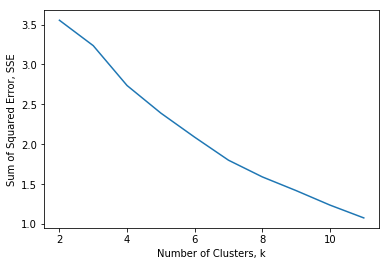

In [134]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# SSE is initialize with empty values
# n_clusters is the "k" 
sse = {}
for n_cluster1 in range(2, 12):
    kmeans1 = KMeans(n_clusters = n_cluster1, max_iter = 1000).fit(toronto_grouped_clustering)
    toronto_grouped_clustering["clusters"] = kmeans1.labels_
    
    # The inertia is the sum of distances of samples to their closest cluster centre
    sse[n_cluster1] = kmeans1.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters, k")
plt.ylabel("Sum of Squared Error, SSE")
plt.show()

In [135]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster2 in range(2, 12):
    kmeans2 = KMeans(n_clusters = n_cluster2, random_state = 0).fit(toronto_grouped_clustering)
    label2 = kmeans2.labels_
    sil_coeff = silhouette_score(toronto_grouped_clustering, label2, metric = 'euclidean')
    print("Where n_clusters = {}, the Silhouette Coefficient is {}".format(n_cluster2, sil_coeff))

Where n_clusters = 2, the Silhouette Coefficient is 0.8148124239113829
Where n_clusters = 3, the Silhouette Coefficient is 0.7629510550931864
Where n_clusters = 4, the Silhouette Coefficient is 0.7233985797429123
Where n_clusters = 5, the Silhouette Coefficient is 0.6769923579596154
Where n_clusters = 6, the Silhouette Coefficient is 0.6647622802889221
Where n_clusters = 7, the Silhouette Coefficient is 0.6408192895462537
Where n_clusters = 8, the Silhouette Coefficient is 0.6288401478953508
Where n_clusters = 9, the Silhouette Coefficient is 0.6286912968363987
Where n_clusters = 10, the Silhouette Coefficient is 0.6109539521606234
Where n_clusters = 11, the Silhouette Coefficient is 0.599363013779723


In [137]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_clusters['Latitude'], toronto_clusters['Longitude'], toronto_clusters['Neighborhood'], toronto_clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

display(map_clusters)

In [138]:
toronto_clusters.loc[toronto_clusters['Cluster Labels'] == 0, toronto_clusters.columns[[1] + list(range(5, toronto_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,0,Health Food Store,Trail,Neighborhood,Church,Pub,Coffee Shop,Department Store,Electronics Store,Flower Shop,Fish Market
1,East Toronto,0,Bus Line,Business Service,Park,Grocery Store,Discount Store,Yoga Studio,Ethiopian Restaurant,Food,Flower Shop,Fish Market
2,East Toronto,0,Fast Food Restaurant,Park,Pub,Burrito Place,Liquor Store,Sandwich Place,Steakhouse,Light Rail Station,Sushi Restaurant,Movie Theater
3,East Toronto,0,Baseball Field,Business Service,Athletics & Sports,Government Building,Night Market,Electronics Store,Food & Drink Shop,Food,Flower Shop,Fish Market
5,Central Toronto,0,Bus Line,Food & Drink Shop,Convenience Store,Breakfast Spot,Department Store,Gym,Park,Ethiopian Restaurant,Food,Flower Shop
6,Central Toronto,0,Playground,Gym Pool,Garden,Park,Donut Shop,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
7,Central Toronto,0,Dessert Shop,Pizza Place,Park,Café,Sandwich Place,Italian Restaurant,Coffee Shop,Thai Restaurant,Seafood Restaurant,Sushi Restaurant
8,Central Toronto,0,Playground,Convenience Store,Gym,Donut Shop,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
9,Central Toronto,0,Coffee Shop,Light Rail Station,Health & Beauty Service,Liquor Store,Supermarket,Athletics & Sports,Skating Rink,Spa,Fish Market,Flower Shop
10,Downtown Toronto,0,Playground,Candy Store,Grocery Store,Park,Donut Shop,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


In [139]:

toronto_clusters.loc[toronto_clusters['Cluster Labels'] == 1, toronto_clusters.columns[[1] + list(range(5, toronto_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Central Toronto,1,Bus Line,Swim School,Yoga Studio,Food Truck,Food & Drink Shop,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant


In [140]:
toronto_clusters.loc[toronto_clusters['Cluster Labels'] == 2, toronto_clusters.columns[[1] + list(range(5, toronto_clusters.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Central Toronto,2,IT Services,Ice Cream Shop,Yoga Studio,Eastern European Restaurant,Food & Drink Shop,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant
